In [1]:
import os
os.chdir('D:datasets/')

# import Lab

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv('e_commerce.csv')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0,0
3329,68,415,3703271,no,no,0,231,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0,0
3330,28,510,3288230,no,no,0,181,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0,0
3331,184,510,3646381,yes,no,0,214,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [5]:
df.isna().sum()

account length                          0
location code                           0
user id                                 0
credit card info save                   0
push status                             0
add to wishlist                         0
desktop sessions                        0
app sessions                            0
desktop transactions                    0
total product detail views             52
session duration                        0
promotion clicks                        0
avg order value                         0
sale product views                      0
discount rate per visited products      0
product detail view per app session    61
app transactions                        0
add to cart per session                 0
customer service calls                 59
churn                                   0
dtype: int64

# graph Ratio of close the appliation or not

<Axes: xlabel='churn'>

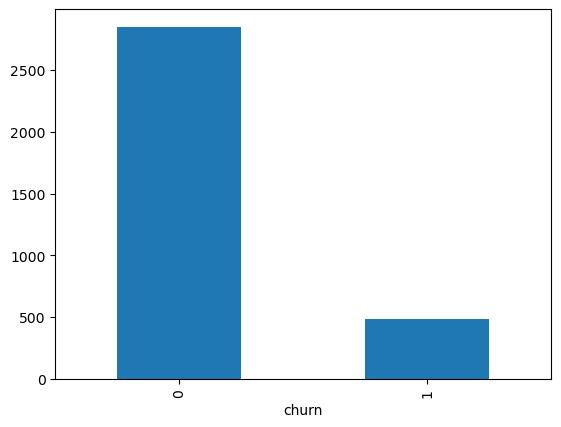

In [10]:
df['churn'].value_counts().plot(kind='bar')

# Removing unwanted columns

In [7]:
df.drop(['account length','location code','user id',],axis=1,inplace=True)
df

,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,no,yes,36,156,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0,0
3329,no,no,0,231,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0,0
3330,no,no,0,181,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0,0
3331,yes,no,0,214,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0,0


# Feature Engineering

In [8]:
x=df.drop(['churn'],axis=1)
y=df['churn']

In [11]:
x.isna().sum()

credit card info save                   0
push status                             0
add to wishlist                         0
desktop sessions                        0
app sessions                            0
desktop transactions                    0
total product detail views             52
session duration                        0
promotion clicks                        0
avg order value                         0
sale product views                      0
discount rate per visited products      0
product detail view per app session    61
app transactions                        0
add to cart per session                 0
customer service calls                 59
dtype: int64

In [12]:
for i in x.columns:
    if x[i].dtypes=='object':
        x[i]=x[i].fillna(x[i].mode()[0])
    else:
        x[i]=x[i].fillna(x[i].median())

In [13]:
x.isna().sum()

credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
dtype: int64

In [14]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)


# Building Pipeline

In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())])

In [16]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [17]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())

In [18]:
x1

,num_pipe__add to wishlist,num_pipe__desktop sessions,num_pipe__app sessions,num_pipe__desktop transactions,num_pipe__total product detail views,num_pipe__session duration,num_pipe__promotion clicks,num_pipe__avg order value,num_pipe__sale product views,num_pipe__discount rate per visited products,num_pipe__product detail view per app session,num_pipe__app transactions,num_pipe__add to cart per session,num_pipe__customer service calls,cat_pipe__credit card info save,cat_pipe__push status
0,1.234883,1.564550,1.557193,-0.020265,0.474708,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088435,-0.601195,-0.085690,-0.421808,0.0,1.0
1,1.307948,-0.327130,-0.384977,-0.020265,1.128760,-0.099387,0.145038,1.058571,0.147825,1.059390,1.248892,-0.601195,1.241169,-0.421808,0.0,1.0
2,-0.591760,1.160502,1.125600,-1.639456,0.675955,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.706732,0.211534,0.697156,-1.187125,0.0,0.0
3,-0.591760,2.188988,2.204583,-2.796021,-1.487447,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.317330,1.024263,-1.306401,0.343509,1.0,0.0
4,-0.591760,-0.235301,-0.277078,-0.945517,0.625643,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.052291,-0.601195,-0.045885,1.108826,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.038605,-0.437325,-0.384977,0.211048,-1.185577,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124579,0.617898,-0.125496,0.343509,0.0,1.0
3329,-0.591760,0.940112,0.909803,-0.945517,0.021903,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.233011,-0.194831,-0.231645,1.108826,0.0,0.0
3330,-0.591760,0.021821,0.046617,1.830239,0.424396,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393468,0.617898,1.387123,0.343509,0.0,0.0
3331,-0.591760,0.627893,0.586108,-0.714204,0.223150,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895634,2.243356,-1.876950,0.343509,1.0,0.0


# Spliting Data into training and Testing format

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=32)

# Model

In [20]:
la=LogisticRegression()
dtr=DecisionTreeClassifier()
ri=RandomForestClassifier()
ad=AdaBoostClassifier()
kn=KNeighborsClassifier()
sc=SVC()
model_list=[la,dtr,ri,ad,kn,sc]

In [21]:
for i in model_list:
    i.fit(x_train,y_train)
    
    #Prediction
    y_train_pred=i.predict(x_train)
    y_pred=i.predict(x_test)
    
    #Error Calculation
    tr_f1=round(f1_score(y_train_pred,y_train),2)
    tr_cnf=confusion_matrix(y_train_pred,y_train)
    ts_f1=round(f1_score(y_pred,y_test),2)
    ts_cnf=confusion_matrix(y_pred,y_test)
    
    print('*'*60)
    print(i)
    print('Train f1 Score:',tr_f1)
    print('Confision_train',tr_cnf)
    print('*'*30)
    print('Test f1 Score:',ts_f1)
    print('COnfusion_test',ts_cnf)

************************************************************
LogisticRegression()
Train f1 Score: 0.3
Confision_train [[2226  306]
 [  55   79]]
******************************
Test f1 Score: 0.3
COnfusion_test [[553  78]
 [ 16  20]]
************************************************************
DecisionTreeClassifier()
Train f1 Score: 1.0
Confision_train [[2281    0]
 [   0  385]]
******************************
Test f1 Score: 0.7
COnfusion_test [[538  29]
 [ 31  69]]
************************************************************
RandomForestClassifier()
Train f1 Score: 1.0
Confision_train [[2281    0]
 [   0  385]]
******************************
Test f1 Score: 0.82
COnfusion_test [[566  28]
 [  3  70]]
************************************************************
AdaBoostClassifier()
Train f1 Score: 0.54
Confision_train [[2220  221]
 [  61  164]]
******************************
Test f1 Score: 0.51
COnfusion_test [[548  57]
 [ 21  41]]
*********************************************************

# As per Analysis RandomForest Model is best for this data

In [25]:
grid={
      'n_estimators':range(1,250),
      'criterion':['gini','entropy'],
      'max_depth':range(1,200),
      'min_samples_leaf':range(1,20)
      
      } 

In [26]:
rs=RandomizedSearchCV(ri,param_distributions=grid,cv=3)

In [27]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 200),
                                        'min_samples_leaf': range(1, 20),
                                        'n_estimators': range(1, 250)})

In [28]:
rs.best_params_

{'n_estimators': 124,
 'min_samples_leaf': 1,
 'max_depth': 138,
 'criterion': 'entropy'}

In [29]:
ri1=rs.best_estimator_
ri1

RandomForestClassifier(criterion='entropy', max_depth=138, n_estimators=124)

# Traning Decision Model

In [30]:
y_pred_train1=ri1.predict(x_train)

acc=accuracy_score(y_pred_train1,y_train)
clss=classification_report(y_pred_train1,y_train)
cnf=confusion_matrix(y_pred_train1,y_train)

print("Accuracy:",acc)
print("Classification Score:",clss)
print("confusion Metrics",cnf)

Accuracy: 1.0
Classification Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2281
           1       1.00      1.00      1.00       385

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

confusion Metrics [[2281    0]
 [   0  385]]


# Testing Decision Model

In [31]:
y_pred1=ri1.predict(x_test)

acc1=accuracy_score(y_pred1,y_test)
clss1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)

print("Accuracy:",acc1)
print("Classification Score:",clss1)
print("confusion Metrics",cnf1)

Accuracy: 0.9550224887556222
Classification Score:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       593
           1       0.72      0.96      0.83        74

    accuracy                           0.96       667
   macro avg       0.86      0.96      0.90       667
weighted avg       0.96      0.96      0.96       667

confusion Metrics [[566  27]
 [  3  71]]


# Prediction for new Model

In [32]:
df1=pd.read_csv("D:/datasets/testing_ecommerce.csv")
df1

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,116,415,3802929,no,yes,24,233,40,13,90.0,152,94,344.3,82,15.49,10.7,6,2.89,1.0
1,56,415,3895988,no,yes,24,122,21,16,87.0,184,76,266.6,98,12.00,12.7,3,3.43,1.0
2,122,415,4067737,yes,yes,40,216,37,21,80.0,250,90,185.9,99,8.37,12.7,4,3.43,1.0
3,76,510,4218141,no,no,0,166,28,22,94.0,257,80,170.8,114,7.69,10.0,4,2.70,1.0
4,85,510,4042871,no,no,0,183,31,14,111.0,169,98,199.7,97,8.99,9.9,4,2.67,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,408,3312144,no,yes,26,208,35,16,115.0,185,113,177.7,144,8.00,8.1,9,2.19,1.0
996,137,408,3573187,no,no,0,209,36,19,120.0,225,100,221.6,130,9.97,11.1,5,3.00,0.0
997,96,510,4205990,no,no,0,98,17,26,100.0,307,88,182.5,120,8.21,7.6,1,2.05,2.0
998,201,510,3738900,no,no,0,213,36,19,72.0,225,90,195.1,99,8.78,7.0,6,1.89,1.0


In [33]:
x2=pd.DataFrame(pre.transform(df1),columns=pre.get_feature_names_out())
x2

,num_pipe__add to wishlist,num_pipe__desktop sessions,num_pipe__app sessions,num_pipe__desktop transactions,num_pipe__total product detail views,num_pipe__session duration,num_pipe__promotion clicks,num_pipe__avg order value,num_pipe__sale product views,num_pipe__discount rate per visited products,num_pipe__product detail view per app session,num_pipe__app transactions,num_pipe__add to cart per session,num_pipe__customer service calls,cat_pipe__credit card info save,cat_pipe__push status
0,1.161817,0.976844,1.017702,-0.945517,-0.531526,-0.967122,-0.306748,2.836436,-0.925484,2.834799,0.164573,0.617898,0.166413,-0.421808,0.0,1.0
1,1.161817,-1.061763,-1.032366,-0.251578,-0.682461,-0.336042,-1.210321,1.299838,-0.107725,1.301092,0.887452,-0.601195,0.882917,-0.421808,0.0,1.0
2,2.330868,0.664625,0.694007,0.904987,-1.034642,0.965560,-0.507542,-0.296087,-0.056615,-0.294140,0.887452,-0.194831,0.882917,-0.421808,1.0,1.0
3,-0.591760,-0.253667,-0.277078,1.136300,-0.330279,1.103608,-1.009527,-0.594706,0.710034,-0.592971,-0.088435,-0.194831,-0.085690,-0.421808,0.0,0.0
4,-0.591760,0.058552,0.046617,-0.714204,0.525020,-0.631861,-0.105954,-0.023178,-0.158835,-0.021676,-0.124579,-0.194831,-0.125496,1.874143,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.307948,0.517698,0.478210,-0.251578,0.726266,-0.316321,0.647023,-0.458251,2.243331,-0.456739,-0.775171,1.836992,-0.762389,-0.421808,0.0,1.0
996,-0.591760,0.536064,0.586108,0.442361,0.977825,0.472529,-0.005558,0.409917,1.527792,0.408992,0.309149,0.211534,0.312367,-1.187125,0.0,0.0
997,-0.591760,-1.502542,-1.463960,2.061552,-0.028409,2.089670,-0.607939,-0.363326,1.016693,-0.364453,-0.955890,-1.413924,-0.948149,0.343509,0.0,0.0
998,-0.591760,0.609527,0.586108,0.442361,-1.437136,0.472529,-0.507542,-0.114148,-0.056615,-0.113962,-1.172754,0.617898,-1.160446,-0.421808,0.0,0.0


In [34]:
pred=ri1.predict(x2)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
prediction=df1[['user id']]

In [36]:
prediction['Prediction']=pred
prediction

C:\Users\Sanskar\AppData\Local\Temp\ipykernel_15208\2071224851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Prediction']=pred


,user id,Prediction
0,3802929,0
1,3895988,0
2,4067737,0
3,4218141,0
4,4042871,0
...,...,...
995,3312144,0
996,3573187,0
997,4205990,0
998,3738900,0
